# 分析競業Line的文章標題，有哪些關鍵字詞

## 1. Import module

In [1]:
## Basic Module

import os
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
# We'll code the graphs using 'matplotlib' but they'll be displayed with the 'seaborn' look
%matplotlib inline 
# 可內嵌繪圖，並且可省略 plt.show()這個指令

## NLP
# from ArticutAPI import ArticutAPI
# from ckip import CkipSegmenter
import jieba
import jieba.analyse
# For TF-IDF
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Don't show warning message
import warnings
warnings.filterwarnings(action='ignore')

## 2. Load Data

In [2]:
bw_cw = input("請輸入(「BW」或「CW」)：")

請輸入(「BW」或「CW」)：BW


In [3]:
df_line = pd.read_csv(f"Article_title_{bw_cw}.csv", encoding = "cp950")

df_line.head()

,文章標題
0,新創導師評AI未來發展：ChatGPT會更野蠻生長，台灣最佳賽道在應用 - 商業周刊第188...
1,OpenAI事件藏人類存亡危機 看懂矽谷最夯有效利他主義 - 商業周刊第1881期 - 商周線上讀
2,【12/07百大調查局】如何提高產品勝率？─商周百大顧問
3,美債狂漲一波，焦點轉向了：何時開始降息、降多少
4,重電股熱翻！華城、中興電、東元都受惠，想進場先看這點 - 商業周刊第1854期 - 商周線上讀


In [4]:
df_line_copy = df_line.copy()

## 3. Data preprocessing

In [5]:
df_line[df_line["文章標題"].isnull()]

,文章標題


In [6]:
blank_title = []

for index, title in df_line.itertuples():
    if title.isspace():
        blank_title.append(index)
        
blank_title

[]

## 4. 文本分析

In [7]:
inputSTR_LIST = []

for num in range(len(df_line)):
    inputSTR_LIST.append(df_line["文章標題"][num])
    inputSTR = " ".join(inputSTR_LIST)

inputSTR = inputSTR.replace('\u3000', ' ')
inputSTR[:100]

'新創導師評AI未來發展：ChatGPT會更野蠻生長，台灣最佳賽道在應用 - 商業周刊第1881期 - 商周線上讀 OpenAI事件藏人類存亡危機 看懂矽谷最夯有效利他主義 - 商業周刊第1881期 -'

### jieba


https://blog.kennycoder.io/2020/02/12/Python-%E7%9F%A5%E5%90%8DJieba%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E%E5%B7%A5%E5%85%B7%E6%95%99%E5%AD%B8/

In [18]:
## 匯入繁體中文詞組包

jieba.set_dictionary('../../../Jieba/dict.txt.big')



## 設定停用詞

jieba.analyse.set_stop_words('../../../Jieba/Stopwords.txt')
jieba.analyse.set_stop_words('./jieba_stopword_cw_bw.txt')

## 匯入自定義辭典
jieba.load_userdict('./jieba_word_cw_bw.txt')

Building prefix dict from C:\Users\JoeJian\OneDrive - Business Today Magazine\桌面\Python Codes\Jieba\dict.txt.big ...
Loading model from cache C:\Users\JoeJian\AppData\Local\Temp\jieba.u338497a058a89110ae3ea49198fd830c.cache
Loading model cost 1.254 seconds.
Prefix dict has been built successfully.


### 5.1 TF-IDF

In [19]:
## Return all result
tags = jieba.analyse.extract_tags(inputSTR, topK = 20, withWeight = True)
# topK 代表返回 TF-IDF 權重最大的關鍵字，默認為 20
# withWeight 代表是否返回關鍵字權重值，默認為 False
# allowPOS 代表指定詞性，默認為空，也就是不篩選

TF_IDF_ALL_LIST = []

word_num = 1
for tag in tags:
    print(f'word_{word_num}:', tag[0], 'tf-idf:', tag[1])
    TF_IDF_ALL_LIST.append(tag[0])
    
    word_num += 1

word_1: 商周線上讀 tf-idf: 0.3118635000756521
word_2: 商業周刊 tf-idf: 0.14926800003620957
word_3: 台灣 tf-idf: 0.09329250002263098
word_4: 2024 tf-idf: 0.09329250002263098
word_5: 中國 tf-idf: 0.06930300001681158
word_6: 一個 tf-idf: 0.05064450001228539
word_7: 商業 tf-idf: 0.04797900001163879
word_8: 經濟 tf-idf: 0.04531350001099219
word_9: 總統大選 tf-idf: 0.04531350001099219
word_10: 商周 tf-idf: 0.04168846665382609
word_11: 台積電 tf-idf: 0.03998250000969899
word_12: 企業 tf-idf: 0.037317000009052394
word_13: 2023 tf-idf: 0.03465150000840579
word_14: 專訪 tf-idf: 0.03465150000840579
word_15: 退休 tf-idf: 0.03251029624773913
word_16: 離職 tf-idf: 0.0319860000077592
word_17: alive tf-idf: 0.0319860000077592
word_18: 美學 tf-idf: 0.0319860000077592
word_19: 人生 tf-idf: 0.03053715318947603
word_20: 百大 tf-idf: 0.030266174014742474


In [20]:
TF_IDF_ALL_LIST

['商周線上讀',
 '商業周刊',
 '台灣',
 '2024',
 '中國',
 '一個',
 '商業',
 '經濟',
 '總統大選',
 '商周',
 '台積電',
 '企業',
 '2023',
 '專訪',
 '退休',
 '離職',
 'alive',
 '美學',
 '人生',
 '百大']

In [21]:
## Show POS = 'n'
TF_IDF_Noun_LIST = []

tags = jieba.analyse.extract_tags(inputSTR, topK = 20, withWeight = True, allowPOS = 'n')

word_num = 1
for tag in tags:
    print(f'word_{word_num}:', tag[0], 'tf-idf:', tag[1])
    TF_IDF_Noun_LIST.append(tag[0])
    
    word_num += 1

word_1: 人生 tf-idf: 0.22019153063472668
word_2: 名人 tf-idf: 0.158594952597299
word_3: 缺工 tf-idf: 0.15375906756141478
word_4: 哲家 tf-idf: 0.11531930067106108
word_5: 低薪 tf-idf: 0.11289504573569131
word_6: 退休金 tf-idf: 0.09508964357691319
word_7: 年薪 tf-idf: 0.09443540631318328
word_8: 主管 tf-idf: 0.09247787192951769
word_9: 降息 tf-idf: 0.08996109331321545
word_10: 全球 tf-idf: 0.08669213985625401
word_11: 能力 tf-idf: 0.07934635173906752
word_12: 人才 tf-idf: 0.07411288558768489
word_13: 全台 tf-idf: 0.07341331834212218
word_14: 怪象 tf-idf: 0.07289857424115756
word_15: 整理 tf-idf: 0.07094854893146302
word_16: 寒流 tf-idf: 0.0594644199473955
word_17: 外媒 tf-idf: 0.05765965033553054
word_18: 全家 tf-idf: 0.0494668014526045
word_19: 能源 tf-idf: 0.0485229722426045
word_20: 魔芋 tf-idf: 0.047717095498745976


### jieba.lcut and Word Cloud

In [22]:
seg_list = []
seg_list = jieba.lcut(inputSTR, cut_all=False)
print('list: ',seg_list[:20])

list:  ['新創', '導師', '評', 'AI', '未來', '發展', '：', 'ChatGPT', '會', '更', '野蠻', '生長', '，', '台灣', '最佳', '賽道', '在', '應用', ' ', '-']


In [23]:
# 移除停留詞
def remove_stop_words(file_name,seg_list):
    with open(file_name, 'r', encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    new_list = []
  
    for seg in seg_list:
        if seg not in stop_words:
            new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = '../../../Jieba/Stopwords.txt'
seg_list = remove_stop_words(file_name, seg_list)
print('remove_stop_words: ', seg_list[:20])

remove_stop_words:  ['新創', '導師', '評', 'AI', '未來', '發展', 'ChatGPT', '野蠻', '生長', '台灣', '最佳', '賽道', '應用', ' ', ' ', '商業周刊第1881期', ' ', ' ', '商周線上讀', ' ']


In [24]:
seg_list = [x.strip(' ') for x in seg_list]

In [25]:
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq
sef_freq = count_segment_freq(seg_list)
sef_freq.head(10)

,count
seg,
,1107
商周線上讀,117
商業周刊,56
期,53
年,40
歲,37
2024,35
台灣,35
人,30


In [26]:
my_font_path = 'C:/Users/JoeJian/OneDrive - Business Today Magazine/桌面/Python Codes/Font/jf-openhuninn-2.0.ttf'

seg_list=' '.join(seg_list)

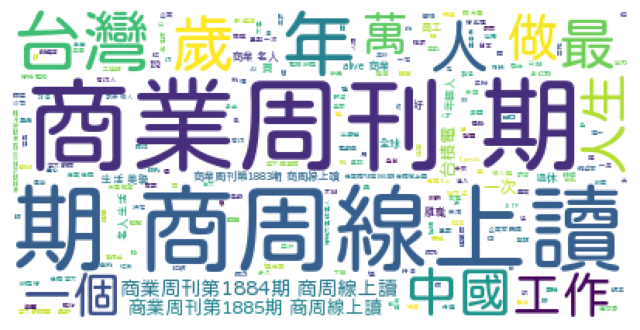

In [27]:
plt.figure(figsize = (8, 6))
wc = WordCloud(background_color='white', font_path = my_font_path)
wc.generate(seg_list)

plt.imshow(wc)
plt.axis("off")
plt.show()